In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [54]:
insurance_dataset=pd.read_csv("insurance.csv")
insurance_dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
insurance_dataset.shape

(1338, 7)

In [56]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [57]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [58]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


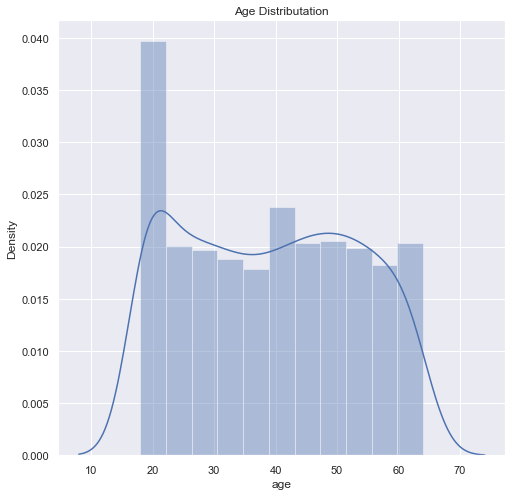

In [59]:
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(insurance_dataset['age'])
plt.title("Age Distributation")
plt.show()

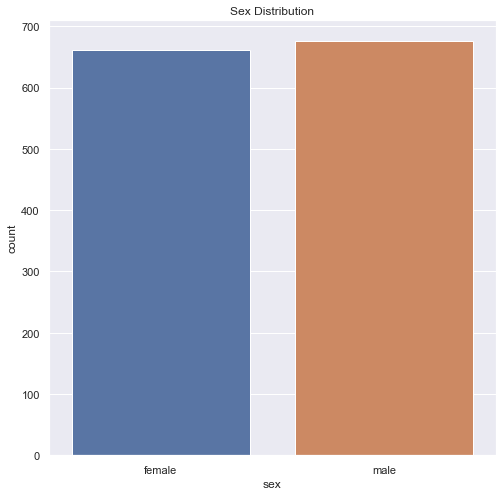

In [60]:
plt.figure(figsize=(8,8))
sns.countplot(x="sex",data=insurance_dataset)
plt.title("Sex Distribution")
plt.show()

In [61]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


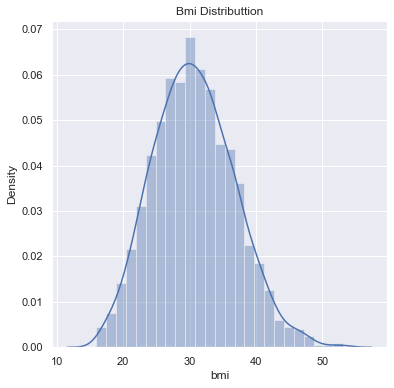

In [62]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title("Bmi Distributtion")
plt.show()

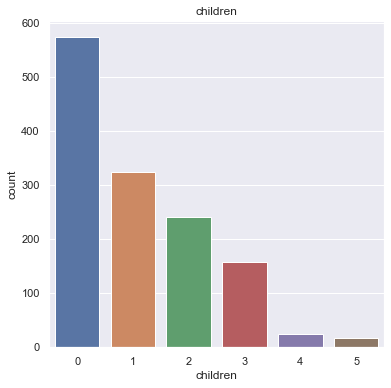

In [63]:
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=insurance_dataset)
plt.title("children")
plt.show()

<Figure size 432x432 with 0 Axes>

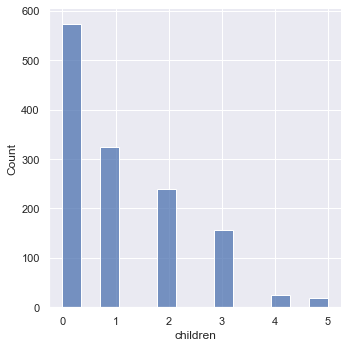

In [64]:
plt.figure(figsize=(6,6))
sns.displot(x="children",data=insurance_dataset)
plt.show()

C:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


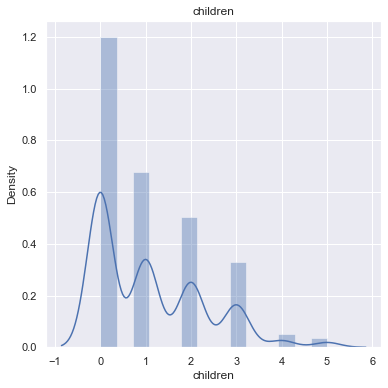

In [65]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['children'])
plt.title('children')
plt.show()

In [66]:
insurance_dataset["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

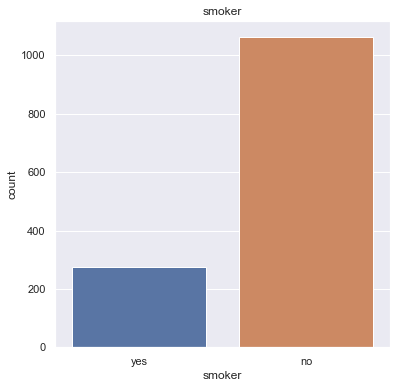

In [67]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title("smoker")
plt.show()

In [68]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

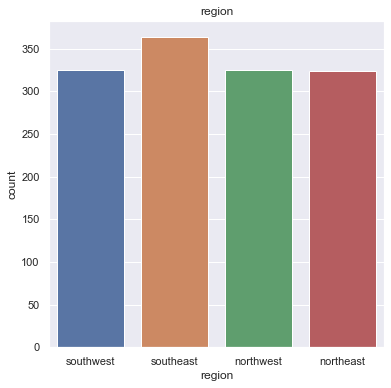

In [69]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title("region")
plt.show()

C:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


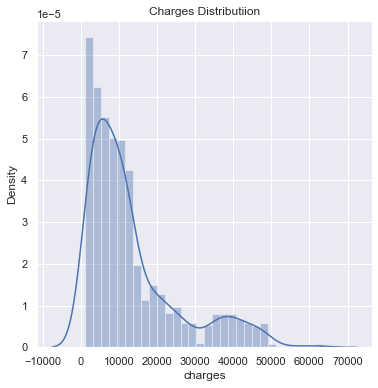

In [70]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title("Charges Distributiion")
plt.show()

In [71]:
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_dataset.replace({"smoker":{'yes':0,'no':1}},inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,"northeast":2,'northwest':3}},inplace=True)


In [72]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [73]:
x=insurance_dataset.drop(columns="charges",axis=1)
y=insurance_dataset['charges']

In [89]:
print(x.head())

   age  sex     bmi  children  smoker  region
0   19    1  27.900         0       0       1
1   18    0  33.770         1       1       0
2   28    0  33.000         3       1       0
3   33    0  22.705         0       1       3
4   32    0  28.880         0       1       3


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [78]:
regressor = LinearRegression()

In [79]:
regressor.fit(x_train, y_train)

LinearRegression()

In [82]:
train_data_prediction=regressor.predict(x_train)
r2_train=metrics.r2_score(y_train,train_data_prediction)
print(r2_train)

0.751505643411174


In [84]:
test_data_prediction=regressor.predict(x_test)
r2_test=metrics.r2_score(y_test,test_data_prediction)
print(r2_test)

0.7447273869684077


In [92]:
input_data=(31,1,25.74,0,1,0)
input_data=(52,1,30.78,1,1,2)
input_data=(18,0,34.1,0,1,0)
input_data_as_numpy=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print("the insurance cost is",prediction)

the insurance cost is [3229.90049768]


C:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
